<a href="https://colab.research.google.com/github/ImHyunSeok/lim_in_aiffel5th/blob/main/%EB%85%B8%EB%93%9C%ED%95%99%EC%8A%B5%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83/deellab_sementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TF2 version
import io
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image as PILImage

IMAGE_WIDTH = 512
IMAGE_HEIGHT = 512

# Download the model from Tensorflow Hub.
keras_layer = hub.KerasLayer('https://tfhub.dev/google/edgetpu/vision/deeplab-edgetpu/default_argmax/m/1')
model = tf.keras.Sequential([keras_layer])
model.build([None, IMAGE_WIDTH, IMAGE_HEIGHT, 3])

In [3]:
# Preprocess image.
image_url = "https://github.com/ImHyunSeok/lim/blob/master/jump.jpg?raw=true"
image_response = requests.get(image_url)
image = PILImage.open(io.BytesIO(image_response.content)).convert('RGB')

min_dim = min(image.size[0], image.size[1])
image = image.resize((IMAGE_WIDTH * image.size[0] // min_dim,
                      IMAGE_HEIGHT * image.size[1] // min_dim))
input_data = np.expand_dims(image, axis=0)
input_data = input_data[:, :IMAGE_WIDTH,:IMAGE_HEIGHT, :]
input_data = input_data.astype(np.float) / 128 - 0.5

<ipython-input-3-c844dd78b30a>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  input_data = input_data.astype(np.float) / 128 - 0.5


In [4]:
# Run segmentation.
output_data = model(input_data)
assert(output_data.numpy().shape == (1, 512, 512))

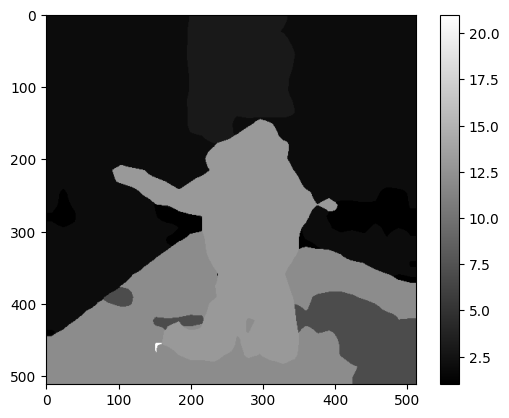

In [5]:
import matplotlib.pyplot as plt

# 결과 이미지를 표시
plt.imshow(output_data[0], cmap='gray')  # cmap은 색상맵을 지정합니다. 여기서는 흑백으로 표시합니다.
plt.colorbar()  # 컬러바 추가 (옵션)
plt.show()
